In [29]:
import pandas as pd
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
dff = pd.read_csv("gender_submission.csv")

In [30]:
dff.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [31]:
from sklearn.model_selection import train_test_split 

x = dff[dff.columns[:-1]] 
y = dff[dff.columns[-1]]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [34]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(x_train, y_train) 

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


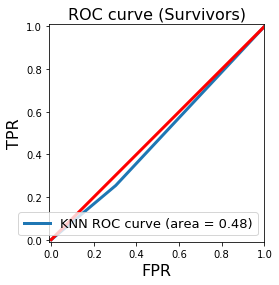

In [49]:
y_score_knn = knn.fit(x_train, y_train).predict(x_test)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_knn, tpr_knn, lw=3, label='KNN ROC curve (area = {:0.2f})'.format(roc_auc_knn))
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.title('ROC curve (Survivors)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='-')
plt.axes().set_aspect('equal')
plt.show()

<h3>Ridge_and_Lasso Regression<h3>

In [50]:
from sklearn.linear_model import Ridge,Lasso

In [51]:
rr = Ridge(alpha = 0.01).fit(x_train, y_train)
print(rr.score(x_train,y_train))
print(rr.score(x_test,y_test))

0.0008303500021461518
-0.0018205852842112513


In [52]:
lasso = Lasso(alpha = 0.01).fit(x_train,y_train)

print(lasso.score(x_train,y_train))
print(lasso.score(x_test,y_test))

0.0008303191385595765
-0.0018152587478232896
